In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
# 加载数据
data = pd.read_csv('../../data/economic_forecast/年度数据.csv').iloc[:,1:]

In [3]:
# 提取特征和目标变量
features = data.drop(['国内生产总值(亿元)','商品出口贸易总额(亿美元)','商品进口贸易总额(亿美元)'], axis=1).values
target = data['国内生产总值(亿元)'].values

In [4]:
# 数据归一化
scaler = MinMaxScaler()

In [5]:
scaled_features = scaler.fit_transform(features)

In [6]:
# X_scaled = (X - X_min) / (X_max - X_min)
X_scaled=(target[1:]-target[:-1])/target[:-1]

array([0.16598933, 0.23579907, 0.31177996, 0.36341848, 0.26116474,
       0.17074857, 0.11002651, 0.06875118, 0.06301859, 0.10727946,
       0.1055344 , 0.09790724, 0.1290251 , 0.17768771, 0.15743122,
       0.17147015, 0.2308337 , 0.18198334, 0.09169489, 0.18249174,
       0.18397804, 0.1037828 , 0.10097516, 0.08533396, 0.07038175,
       0.08352503, 0.11473923, 0.10485749, 0.07313769, 0.02742157,
       0.133854  , 0.05305276])

In [7]:
# 数据分割为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(scaled_features[1:], X_scaled, test_size=0.1, random_state=42)

In [8]:
X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(28, 1, 12)
(4, 1, 12)
(28,)
(4,)


In [72]:
# 构建模型
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=32, activation='relu', input_shape=(1, X_train.shape[2])),
    tf.keras.layers.Dense(units=10, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

In [73]:
# 编译模型
model.compile(optimizer='adam', loss='mean_squared_error')

In [74]:
# 训练模型
model.fit(X_train, y_train, epochs=500, batch_size=32)

Epoch 1/500
1/1 [==============================] - 1s 502ms/step - loss: 0.0210
Epoch 2/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0199
Epoch 3/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0188
Epoch 4/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0176
Epoch 5/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0165
Epoch 6/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 7/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0142
Epoch 8/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0131
Epoch 9/500
1/1 [==============================] - 0s 2ms/step - loss: 0.0120
Epoch 10/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0109
Epoch 11/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0100
Epoch 12/500
1/1 [==============================] - 0s 3ms/step - loss: 0.0091
Epoch 13/500
1/1 [==============================] - 0s 2ms/

In [75]:
# 评估模型
loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)

1/1 [==============================] - 0s 80ms/step - loss: 3.3287e-04
Test Loss: 0.0003328720049466938


1/1 [==============================] - 0s 63ms/step


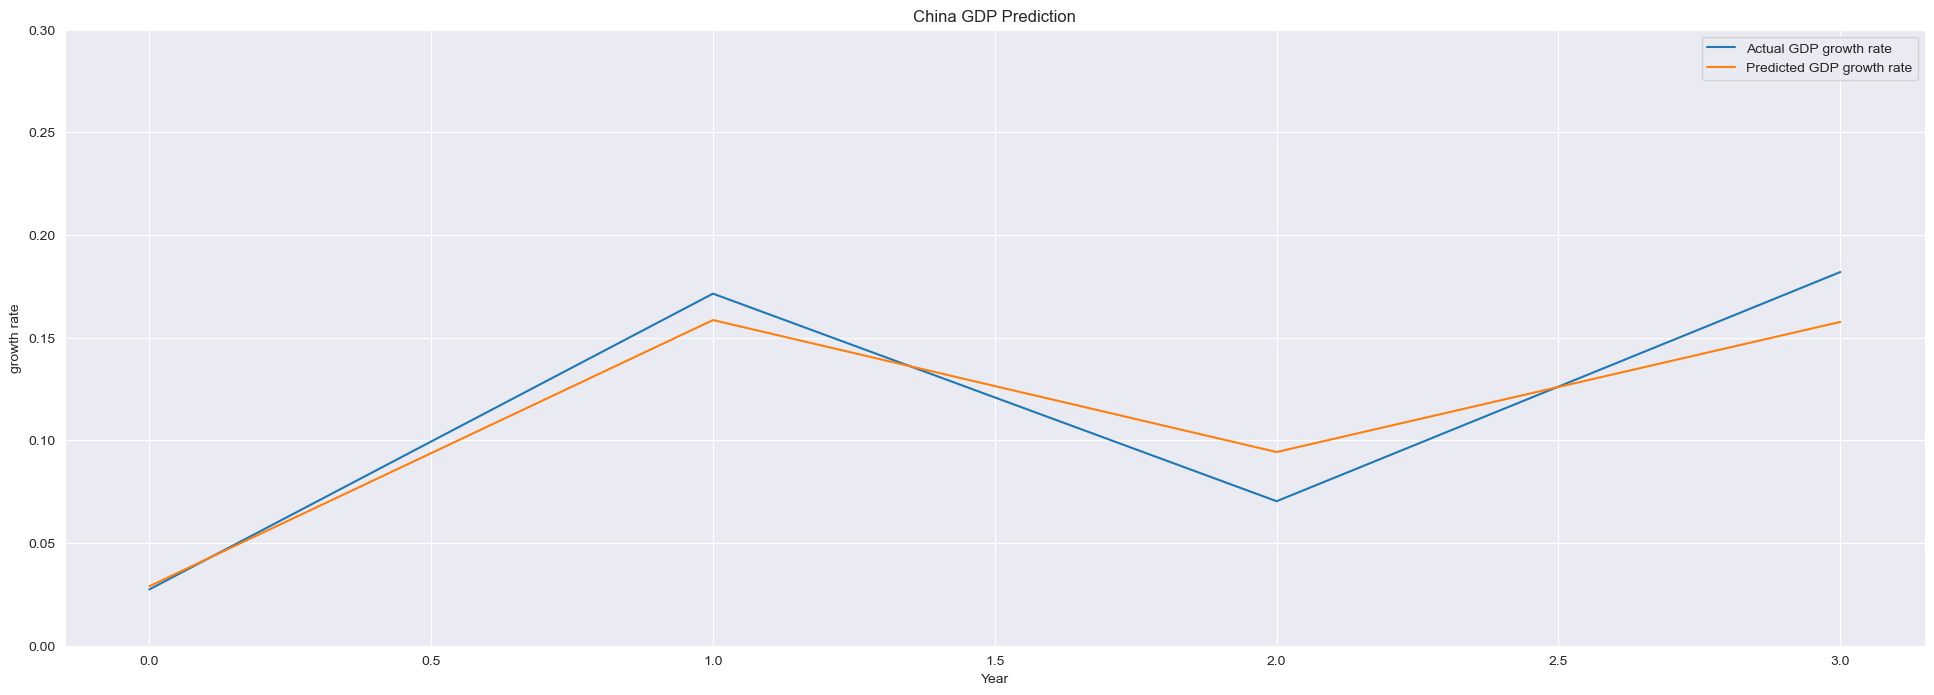

In [76]:
# 使用模型进行预测
predicted_values = model.predict(X_test)

# 可视化预测结果
plt.figure(figsize=(24,8))
plt.plot(y_test, label='Actual GDP growth rate')
plt.plot(predicted_values, label='Predicted GDP growth rate')
plt.title('China GDP Prediction')
plt.xlabel('Year')
plt.ylabel('growth rate')
plt.ylim([0,0.3])
plt.legend()
plt.show()


In [77]:
predicted_gdp=[]
gdp_2015=target[-5]
for i in predicted_values:
    if len(predicted_gdp)==0:
        gdp=gdp_2015
    else:
        gdp=predicted_gdp[-1]
    predicted_gdp.append(gdp*(1+i))

In [78]:
predicted_gdp

[array([945913.94], dtype=float32),
 array([1095937.1], dtype=float32),
 array([1199317.9], dtype=float32),
 array([1388444.5], dtype=float32)]

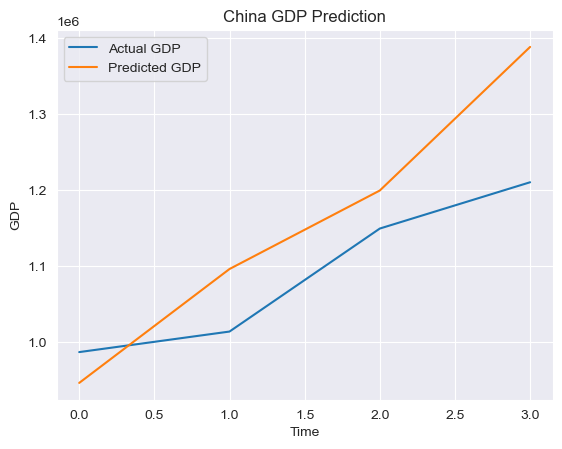

In [79]:
plt.plot(target[29:], label='Actual GDP')
plt.plot(predicted_gdp, label='Predicted GDP')
plt.title('China GDP Prediction')
plt.xlabel('Time')
plt.ylabel('GDP')
plt.legend()
plt.show()

In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, predicted_values)
mse = mean_squared_error(y_test, predicted_values)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predicted_values)

In [86]:
print('平均绝对误差（MAE）:\t'+str(mae))
print('均方误差（MSE）:\t\t'+str(mse))
print('均方根误差（RMSE）:\t'+str(rmse))
print('决定系数（R²）:\t\t'+str(r2))

平均绝对误差（MAE）:	0.01566399019758286
均方误差（MSE）:		0.0003328720838208282
均方根误差（RMSE）:	0.018244782372525803
决定系数（R²）:		0.9231122618596986
